In [193]:
library(pastecs)
library(ggplot2)
library(ggpubr)
library(Hmisc)
library(ggpubr)
library(corrplot)
library(plyr)
library(multcomp)
library(afex)
library(tidyr)
library(ggsignif)
library(ltm)
# library(tidyverse)
library(rms)
library(wesanderson) # color package
library(psych) #EFA
library(lavaan)
library(semPlot)
library(semTools)
library(dplyr)
library(knitr)
library(MVN)
library(lavaanPlot)
library ( semTable )
# library(corrgram)
# library(tidyverse)
library(ggpubr)
library(rstatix)
library(broom)
library(multcomp)
library(xtable)  
par(bg = "#f7f7f7")

In [194]:
## read  csv
cds_df = read.csv('./cnd_csv/allCondition.csv')
llm_df = read.csv('./cnd_csv/llm_data.csv')
label_df = read.csv('./cnd_csv/labels_data.csv')

In [195]:
table(cds_df$condition)


Explanation    Hashtags       Label     noLabel 
         60          60          60          60 

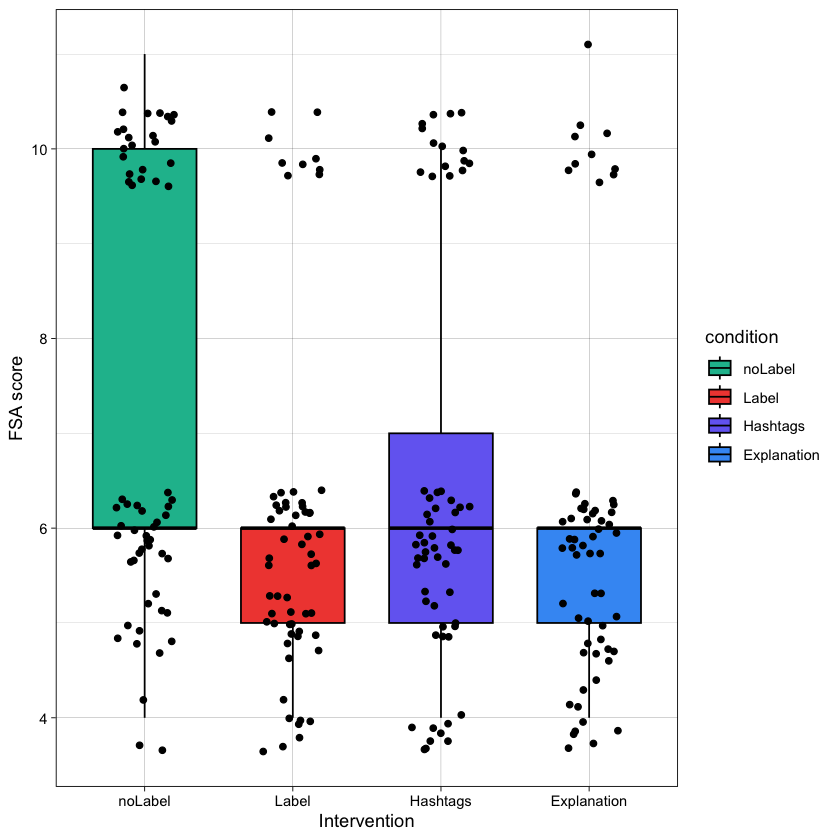

In [196]:
ggboxplot(cds_df, x = "condition", y = "fsa_score", fill = "condition",
           palette = c("#1ABC9C","#F14B3F", "#756DF2", "#419af4" ),
          order = c("noLabel", "Label", "Hashtags", "Explanation"),
          ylab = "FSA score", xlab = "Intervention", add = "jitter") + theme_linedraw()  
ggsave("./fig/fsalabels_all.pdf",  width=8, height=5,dpi=700)

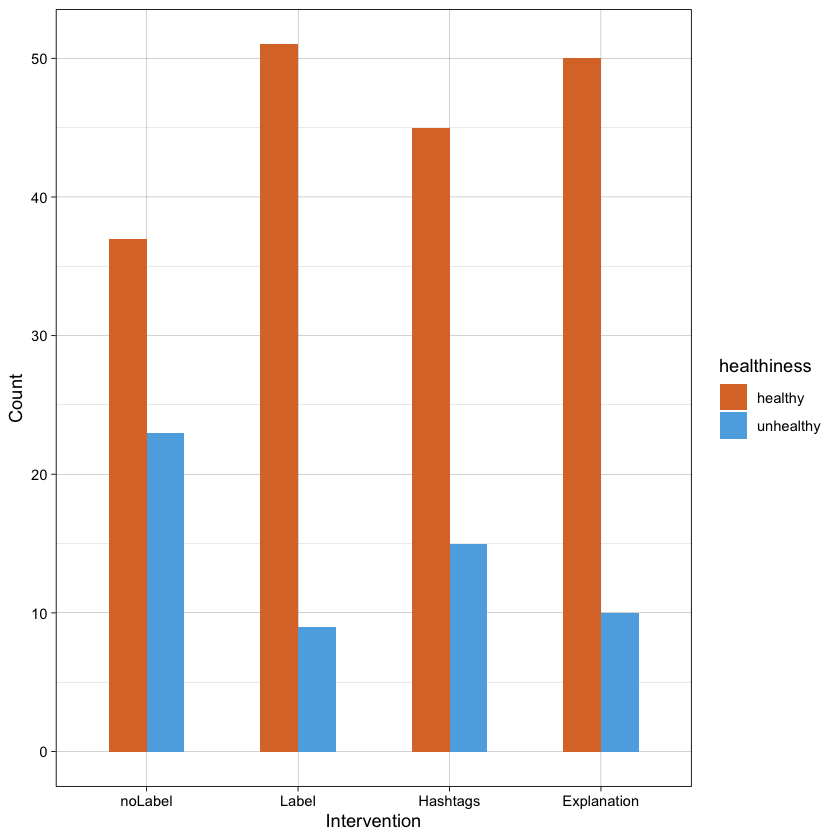

In [197]:
cds_df$condition <- factor(cds_df$condition, levels =  c("noLabel", "Label", "Hashtags", "Explanation"))
choice_dist_polot  = ggplot(data = cds_df, aes(x=condition, group = healthiness, fill=healthiness), ) + geom_bar(width=0.5,position = position_dodge(width=0.5)) + labs(x="Intervention", y='Count') + scale_fill_manual(values = c( "#DC7633","#5DADE2"))+theme_linedraw()  
choice_dist_polot
ggsave("./fig/condition_dist.pdf",  width=8, height=5,dpi=700)

In [198]:
# Compute mean and std for each group
mean_by_group <- tapply(cds_df$fsa_score, cds_df$condition, mean)
std_by_group <- tapply(cds_df$fsa_score, cds_df$condition, sd)


# Print results
print(mean_by_group)
print(std_by_group)

    noLabel       Label    Hashtags Explanation 
   7.283333    6.033333    6.533333    6.116667 
    noLabel       Label    Hashtags Explanation 
   2.255627    1.813010    2.134992    1.940572 


### ANOVA across all

In [199]:
## compute the mean difference across condition
Fsa_mean.model <- fsa_score ~ condition 
Fsa_mean.fit <- lm(Fsa_mean.model, data = cds_df)
summary <- summary(Fsa_mean.fit)
summary


Call:
lm(formula = Fsa_mean.model, data = cds_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2833 -1.2833 -0.5333 -0.0333  4.8833 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)            7.2833     0.2638  27.612  < 2e-16 ***
conditionLabel        -1.2500     0.3730  -3.351 0.000938 ***
conditionHashtags     -0.7500     0.3730  -2.011 0.045514 *  
conditionExplanation  -1.1667     0.3730  -3.127 0.001985 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.043 on 236 degrees of freedom
Multiple R-squared:  0.05627,	Adjusted R-squared:  0.04428 
F-statistic: 4.691 on 3 and 236 DF,  p-value: 0.003346


In [200]:
## introducing Dummies variables
# Create dummy variables for the 'condition' variable
df_dummies  = cds_df

# Create dummy variables for the 'Color' column
dummies <- model.matrix(~ condition - 1, data = df_dummies)

# Combine the dummy variables with the original dataset (optional)
df_dummies <- cbind(df_dummies, dummies)

#### Fsa with dummies

In [201]:
Fsa_mean_dummies.model <- fsa_score ~ conditionHashtags+conditionExplanation +conditionLabel+conditionnoLabel
Fsa_mean.fit <- lm(Fsa_mean_dummies.model, data = df_dummies)
summary <- summary(Fsa_mean.fit)
print(summary)


Call:
lm(formula = Fsa_mean_dummies.model, data = df_dummies)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2833 -1.2833 -0.5333 -0.0333  4.8833 

Coefficients: (1 not defined because of singularities)
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)            7.2833     0.2638  27.612  < 2e-16 ***
conditionHashtags     -0.7500     0.3730  -2.011 0.045514 *  
conditionExplanation  -1.1667     0.3730  -3.127 0.001985 ** 
conditionLabel        -1.2500     0.3730  -3.351 0.000938 ***
conditionnoLabel           NA         NA      NA       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.043 on 236 degrees of freedom
Multiple R-squared:  0.05627,	Adjusted R-squared:  0.04428 
F-statistic: 4.691 on 3 and 236 DF,  p-value: 0.003346



In [202]:
## Anova test 
anova_FSA= aov(fsa_score  ~ condition, data= df_dummies)
summary(anova_FSA)

             Df Sum Sq Mean Sq F value  Pr(>F)   
condition     3   58.7  19.583   4.691 0.00335 **
Residuals   236  985.2   4.175                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [203]:
Labels_fsa_posthoc <- TukeyHSD(anova_FSA,  conf.level = 0.95)
Labels_fsa_posthoc

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = fsa_score ~ condition, data = df_dummies)

$condition
                            diff        lwr        upr     p adj
Label-noLabel        -1.25000000 -2.2152091 -0.2847909 0.0051574
Hashtags-noLabel     -0.75000000 -1.7152091  0.2152091 0.1869986
Explanation-noLabel  -1.16666667 -2.1318757 -0.2014576 0.0106276
Hashtags-Label        0.50000000 -0.4652091  1.4652091 0.5381917
Explanation-Label     0.08333333 -0.8818757  1.0485424 0.9960585
Explanation-Hashtags -0.41666667 -1.3818757  0.5485424 0.6794491


In [204]:
fsa_posthocDF = as.data.frame(Labels_fsa_posthoc$condition)
fsa_posthocDF$pair = rownames(fsa_posthocDF)
# rec= as.data.frame(CD_posthoc$PE)
# all = rbind(CD_posthocDF,rec)
# all$pair = rownames(all)

Saving 7 x 7 in image


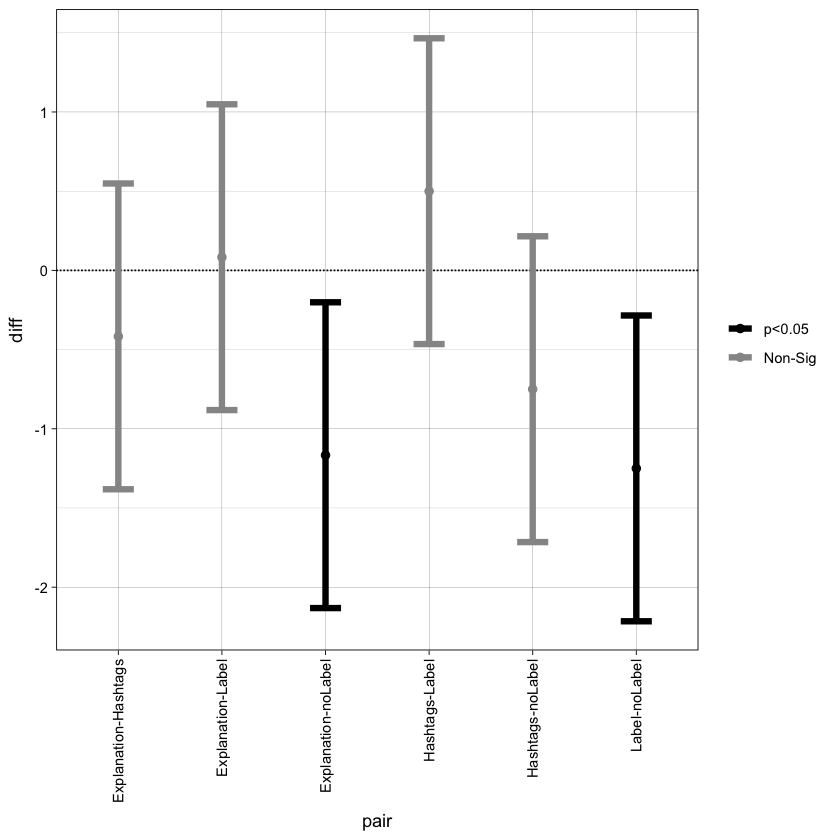

In [205]:

ggplot(fsa_posthocDF, aes( colour=cut(`p adj`, c(0, 0.03, 0.05, 1), 
                           label=c("p<0.05","p<0.05","Non-Sig")))) +
  geom_hline(yintercept=0, lty="11", colour="black") +
  geom_errorbar(aes(pair, ymin=lwr, ymax=upr), width=0.3, size=1.8) +
  geom_point(aes(pair, diff), size=2) +
  labs(colour="") +theme_linedraw()+theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +  scale_color_manual(values = c("black", "grey59"))
  ggsave("./fig/CD_HSD.pdf", dpi=300)

### ANOVA Across labels

In [206]:

# Create dummy variables for the 'Color' column
dummies <- model.matrix(~ condition - 1, data = label_df)

# Combine the dummy variables with the original dataset (optional)
label_dummies <- cbind(label_df, dummies)

In [207]:
Fsa_labe_dummies.model <- fsa_score ~ conditionLabel+ conditionnoLabel 
Fsa_mean.fit <- lm(Fsa_labe_dummies.model, data = label_dummies)
summary <- summary(Fsa_mean.fit)
print(summary)


Call:
lm(formula = Fsa_labe_dummies.model, data = label_dummies)

Residuals:
   Min     1Q Median     3Q    Max 
-3.283 -1.283 -1.033  2.717  3.967 

Coefficients: (1 not defined because of singularities)
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        7.2833     0.2642  27.570   <2e-16 ***
conditionLabel    -1.2500     0.3736  -3.346   0.0011 ** 
conditionnoLabel       NA         NA      NA       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.046 on 118 degrees of freedom
Multiple R-squared:  0.08665,	Adjusted R-squared:  0.07891 
F-statistic: 11.19 on 1 and 118 DF,  p-value: 0.001101



In [208]:
## Anova test 
anova_label_FSA= aov(Fsa_labe_dummies.model, data = label_dummies)
summary(anova_label_FSA)

                Df Sum Sq Mean Sq F value Pr(>F)   
conditionLabel   1   46.9   46.88   11.19 0.0011 **
Residuals      118  494.1    4.19                  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

### ANOVA Across llms

In [209]:


# Create dummy variables for the 'Color' column
dummies <- model.matrix(~ condition - 1, data = llm_df)

# Combine the dummy variables with the original dataset (optional)
llm_dummies <- cbind(llm_df, dummies)

In [210]:
Fsa_llm_dummies.model <- fsa_score ~ conditionExplanation+conditionHashtags
Fsa_mean.fit <- lm(Fsa_llm_dummies.model, data = llm_dummies)
summary <- summary(Fsa_mean.fit)
print(summary)


Call:
lm(formula = Fsa_llm_dummies.model, data = llm_dummies)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5333 -1.1167 -0.5333 -0.1167  4.8833 

Coefficients: (1 not defined because of singularities)
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)            6.5333     0.2634  24.806   <2e-16 ***
conditionExplanation  -0.4167     0.3725  -1.119    0.266    
conditionHashtags          NA         NA      NA       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.04 on 118 degrees of freedom
Multiple R-squared:  0.01049,	Adjusted R-squared:  0.002108 
F-statistic: 1.251 on 1 and 118 DF,  p-value: 0.2656



In [211]:
## Anova test 
anova_label_FSA= aov(Fsa_llm_dummies.model, data = llm_dummies)
summary(anova_label_FSA)

                      Df Sum Sq Mean Sq F value Pr(>F)
conditionExplanation   1    5.2   5.208   1.251  0.266
Residuals            118  491.1   4.162               

## Confirmatory Factor Analysis

In [212]:
cfa_df = read.csv('./cnd_csv/cfa_DF.csv')

### Food Knowledge



In [214]:
SFD.model <- 'SubjectiveFoodKnowledge =~ FK_9 + FK_10 + FK_11 + FK_12' 
SFD.fit <- cfa(SFD.model, data = cfa_df, mimic=c('Mplus'), std.lv = TRUE, ordered = TRUE)
print(summary(SFD.fit, fit.measures = T, standardized=T))

lavaan 0.6.13 ended normally after 12 iterations

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of model parameters                        20

  Number of observations                           240

Model Test User Model:
                                              Standard      Scaled
  Test Statistic                                 0.522       1.085
  Degrees of freedom                                 2           2
  P-value (Chi-square)                           0.770       0.581
  Scaling correction factor                                  0.541
  Shift parameter                                            0.120
    simple second-order correction (WLSMV)                        

Model Test Baseline Model:

  Test statistic                              1683.829    1302.496
  Degrees of freedom                                 6           6
  P-value                                        0.000       0.000
  Scal

In [215]:
parameterEstimates(SFD.fit, standardized=TRUE) %>%
filter(op == "=~") %>%
select('Latent Factor'=lhs, Indicator=rhs, B=est, SE=se, Z=z, 'p-value'=pvalue, Beta=std.all) %>%
knitr::kable(digits = 3, booktabs=TRUE, format="markdown", caption="Factor Loadings")



Table: Factor Loadings

|Latent Factor           |Indicator |     B|    SE|      Z| p-value|  Beta|
|:-----------------------|:---------|-----:|-----:|------:|-------:|-----:|
|SubjectiveFoodKnowledge |FK_9      | 0.797| 0.028| 28.192|       0| 0.797|
|SubjectiveFoodKnowledge |FK_10     | 0.784| 0.029| 27.424|       0| 0.784|
|SubjectiveFoodKnowledge |FK_11     | 0.812| 0.032| 25.697|       0| 0.812|
|SubjectiveFoodKnowledge |FK_12     | 0.804| 0.033| 24.301|       0| 0.804|

pdf 
  2

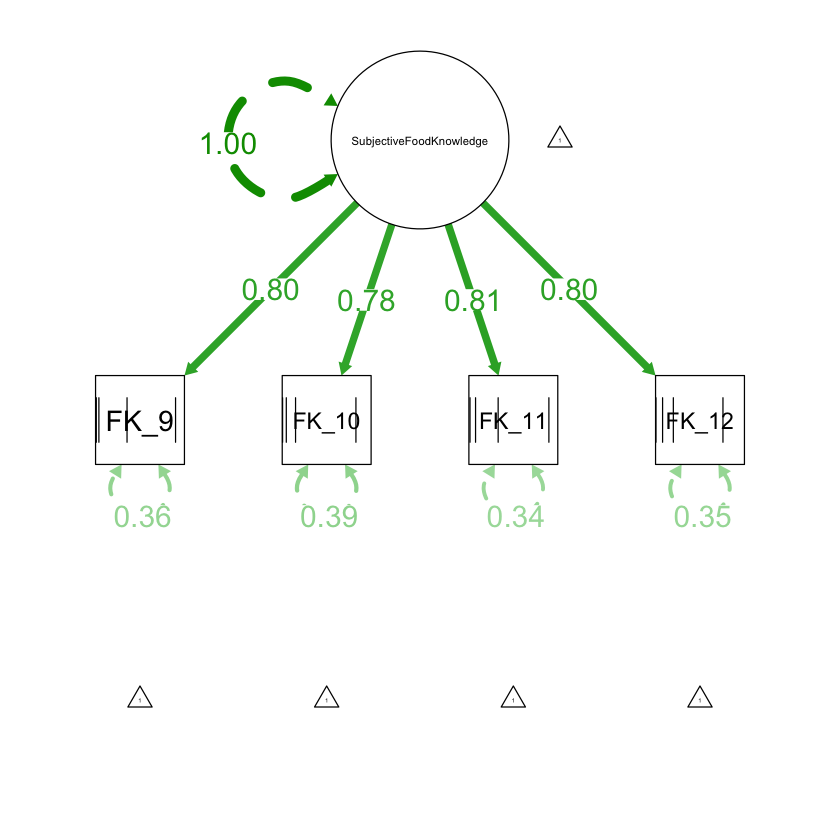

In [216]:
semPaths(SFD.fit, what = "std", residuals = TRUE, nCharNodes = 0, 
 sizeMan = 10, sizeLat = 20,
   edge.label.cex = 1.5, legend = FALSE)
# ggsave("./Fig/CFA_KB.png", dpi=300)
dev.print(pdf, './fig/sfd_fca.pdf')

In [217]:
### Cronbach Alpha
SFD = cfa_df[, c('FK_9','FK_10','FK_11','FK_12')]
sfd_alpha=cronbach.alpha(SFD)
sfd_alpha


Cronbach's alpha for the 'SFD' data-set

Items: 4
Sample units: 240
alpha: 0.812


In [218]:
# Calculate average inter-item correlation
avg_r <- sfd_alpha$alpha * (1 + (4 - 1)) / (4 - 1)

# Approximate AVE
ave <- (sfd_alpha$alpha * avg_r) / (sfd_alpha$alpha * avg_r + (1 - sfd_alpha$alpha))
ave

[1] 0.8241826

In [219]:
AVE(SFD.fit, obs.var = FALSE)

SubjectiveFoodKnowledge 
                  0.639

### Sustainabilty


In [235]:
SUS.model <- 'SustainabilityKnowledge =~ sus_1 + sus_3' 
SUS.fit <- cfa(SUS.model, data = cfa_df)
print(summary(SUS.fit, fit.measures = TRUE, standardized=TRUE))

Warning message in lav_model_vcov(lavmodel = lavmodel, lavsamplestats = lavsamplestats, :
"lavaan WARNING:
    Could not compute standard errors! The information matrix could
    not be inverted. This may be a symptom that the model is not
    identified."


lavaan 0.6.13 ended normally after 11 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                         4

  Number of observations                           240

Model Test User Model:
                                                      
  Test statistic                                    NA
  Degrees of freedom                                -1
  P-value (Unknown)                                 NA

Model Test Baseline Model:

  Test statistic                                    NA
  Degrees of freedom                                NA
  P-value                                           NA

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                       NA
  Tucker-Lewis Index (TLI)                          NA

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)               -577.707
  Loglikelihood unrestricted model (H1)       -5

In [236]:
parameterEstimates(SUS.fit, standardized=TRUE) %>%
filter(op == "=~") %>%
select('Latent Factor'=lhs, Indicator=rhs, B=est, SE=se, Z=z, 'p-value'=pvalue, Beta=std.all) %>%
knitr::kable(digits = 3, booktabs=TRUE, format="markdown", caption="Factor Loadings")



Table: Factor Loadings

|Latent Factor           |Indicator |     B| SE|  Z| p-value|  Beta|
|:-----------------------|:---------|-----:|--:|--:|-------:|-----:|
|SustainabilityKnowledge |sus_1     | 1.000|  0| NA|      NA| 0.871|
|SustainabilityKnowledge |sus_3     | 0.562| NA| NA|      NA| 0.475|

pdf 
  2

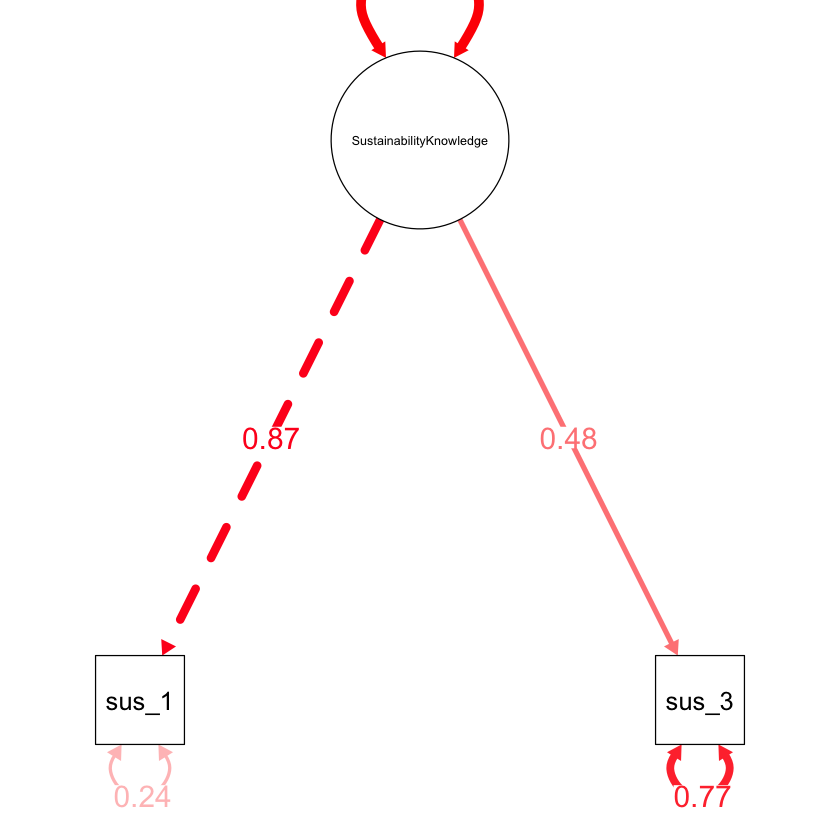

In [237]:
semPaths(SUS.fit, what = "std", residuals = TRUE, nCharNodes = 0, 
 sizeMan = 10, sizeLat = 20,
   edge.label.cex = 1.5, legend = FALSE,posCol = c("red"))
# ggsave("./Fig/CFA_KB.png", dpi=300)
dev.print(pdf, './fig/SUS_fca.pdf')

In [238]:
### Cronbach Alpha
SUS = cfa_df[, c('sus_1','sus_3')]
sus_alpha=cronbach.alpha(SUS)
sus_alpha


Cronbach's alpha for the 'SUS' data-set

Items: 2
Sample units: 240
alpha: 0.585


In [239]:
AVE(SUS.fit, obs.var = FALSE)

SustainabilityKnowledge 
                  0.485

### Choice Satisfaction

In [32]:
ch_satis.model <- 'ChoiceSatisfaction =~ liked_recipes+prepare_recipes+fit_preference+recommend_recipe' 
ch_satis.model.fit <- cfa(ch_satis.model, data = cfa_df, mimic=c('Mplus'), std.lv = TRUE, ordered = TRUE)
print(summary(ch_satis.model.fit, fit.measures = T, standardized=T))

lavaan 0.6.13 ended normally after 11 iterations

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of model parameters                        20

  Number of observations                           240

Model Test User Model:
                                              Standard      Scaled
  Test Statistic                                 1.099       2.241
  Degrees of freedom                                 2           2
  P-value (Chi-square)                           0.577       0.326
  Scaling correction factor                                  0.493
  Shift parameter                                            0.014
    simple second-order correction (WLSMV)                        

Model Test Baseline Model:

  Test statistic                              1870.390    1499.661
  Degrees of freedom                                 6           6
  P-value                                        0.000       0.000
  Scal

In [33]:
parameterEstimates(ch_satis.model.fit , standardized=TRUE) %>%
filter(op == "=~") %>%
select('Latent Factor'=lhs, Indicator=rhs, B=est, SE=se, Z=z, 'p-value'=pvalue, Beta=std.all) %>%
knitr::kable(digits = 3, booktabs=TRUE, format="markdown", caption="Factor Loadings")



Table: Factor Loadings

|Latent Factor      |Indicator        |     B|    SE|      Z| p-value|  Beta|
|:------------------|:----------------|-----:|-----:|------:|-------:|-----:|
|ChoiceSatisfaction |liked_recipes    | 0.908| 0.026| 34.615|       0| 0.908|
|ChoiceSatisfaction |prepare_recipes  | 0.856| 0.030| 28.649|       0| 0.856|
|ChoiceSatisfaction |fit_preference   | 0.800| 0.035| 22.977|       0| 0.800|
|ChoiceSatisfaction |recommend_recipe | 0.739| 0.037| 19.849|       0| 0.739|

pdf 
  2

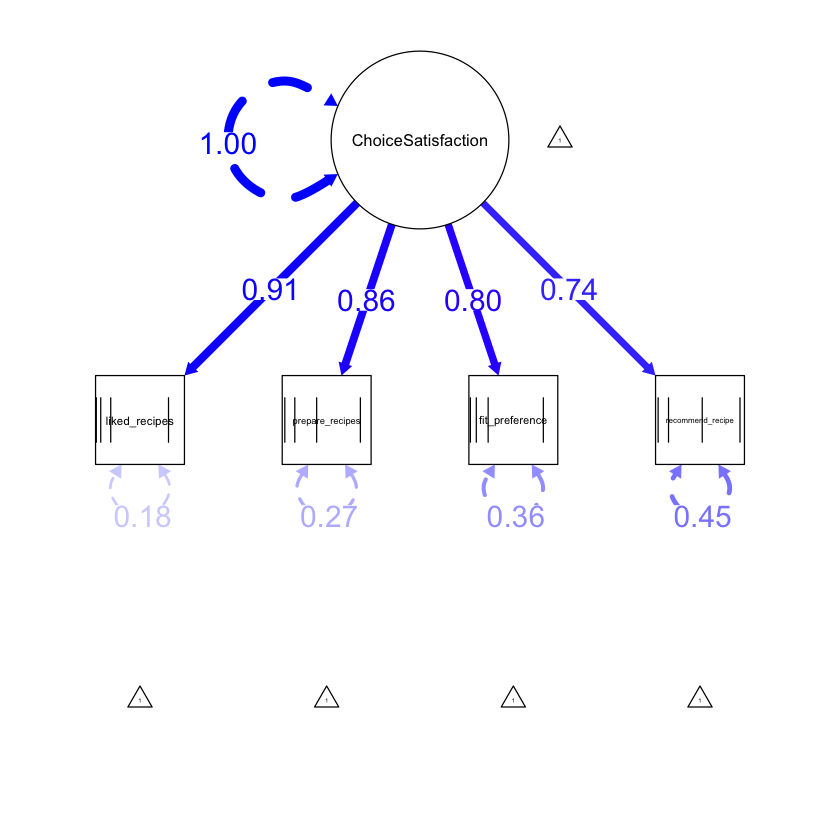

In [34]:
semPaths(ch_satis.model.fit, what = "std", residuals = TRUE, nCharNodes = 0, 
 sizeMan = 10, sizeLat = 20,
   edge.label.cex = 1.5, legend = FALSE,posCol = c("blue"))
# ggsave("./Fig/CFA_KB.png", dpi=300)
dev.print(pdf, './fig/ch_sat.pdf')

In [35]:
### Cronbach Alpha
choi_sats = cfa_df[, c('liked_recipes','prepare_recipes','fit_preference','recommend_recipe')]
choi_sats=cronbach.alpha(choi_sats)
choi_sats


Cronbach's alpha for the 'choi_sats' data-set

Items: 4
Sample units: 240
alpha: 0.854


In [36]:
AVE(ch_satis.model.fit, obs.var = FALSE)

ChoiceSatisfaction 
             0.686

### Choice difficulty

In [37]:
ch_diff.model <- 'ChoiceDifficulty =~  many_to_choose+ easy_choice+choice_overwhelming' 
ch_diff.model.fit <- cfa(ch_diff.model, data = cfa_df, mimic=c('Mplus'), std.lv = TRUE, ordered = TRUE)
print(summary(ch_diff.model.fit, fit.measures = T, standardized=T))

lavaan 0.6.13 ended normally after 1 iteration

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of model parameters                        15

  Number of observations                           240

Model Test User Model:
                                              Standard      Scaled
  Test Statistic                                 0.000       0.000
  Degrees of freedom                                 0           0

Model Test Baseline Model:

  Test statistic                               666.116     576.468
  Degrees of freedom                                 3           3
  P-value                                        0.000       0.000
  Scaling correction factor                                  1.156

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    1.000       1.000
  Tucker-Lewis Index (TLI)                       1.000       1.000
                                       

In [38]:
parameterEstimates(ch_diff.model.fit , standardized=TRUE) %>%
filter(op == "=~") %>%
select('Latent Factor'=lhs, Indicator=rhs, B=est, SE=se, Z=z, 'p-value'=pvalue, Beta=std.all) %>%
knitr::kable(digits = 3, booktabs=TRUE, format="markdown", caption="Factor Loadings")



Table: Factor Loadings

|Latent Factor    |Indicator           |     B|    SE|      Z| p-value|  Beta|
|:----------------|:-------------------|-----:|-----:|------:|-------:|-----:|
|ChoiceDifficulty |many_to_choose      | 0.799| 0.054| 14.853|       0| 0.799|
|ChoiceDifficulty |easy_choice         | 0.898| 0.051| 17.697|       0| 0.898|
|ChoiceDifficulty |choice_overwhelming | 0.518| 0.044| 11.737|       0| 0.518|

pdf 
  2

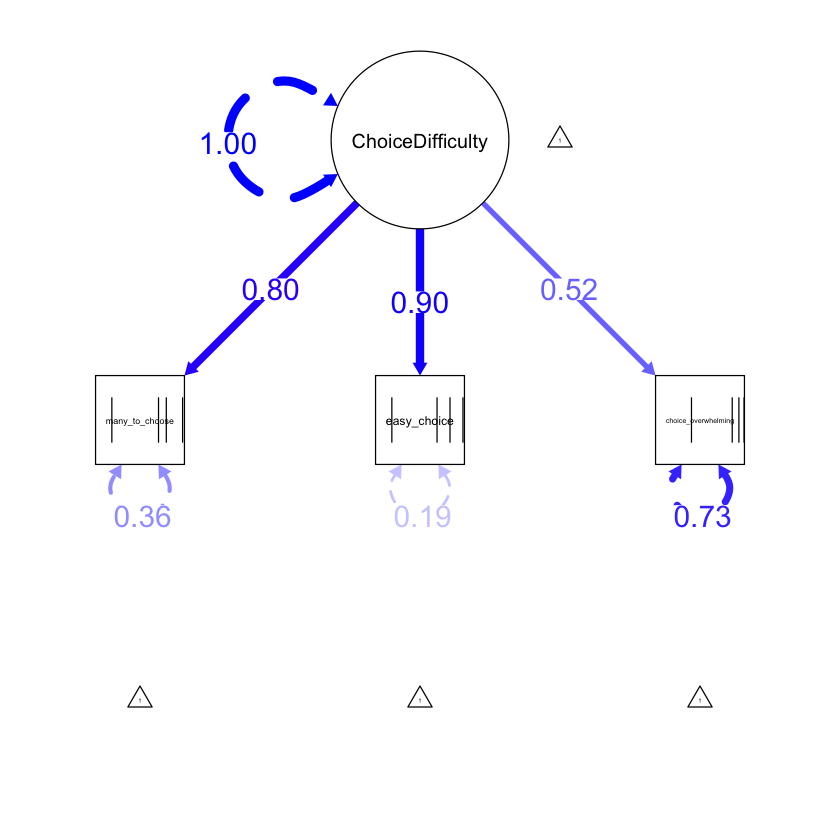

In [39]:
semPaths(ch_diff.model.fit, what = "std", residuals = TRUE, nCharNodes = 0, 
 sizeMan = 10, sizeLat = 20,
   edge.label.cex = 1.5, legend = FALSE,posCol = c("blue"))
# ggsave("./Fig/CFA_KB.png", dpi=300)
dev.print(pdf, './fig/ch_diff.pdf')

In [40]:
### Cronbach Alpha  
choi_diff = cfa_df[, c('many_to_choose','easy_choice','choice_overwhelming')]
choi_diff=cronbach.alpha(choi_diff)
choi_diff


Cronbach's alpha for the 'choi_diff' data-set

Items: 3
Sample units: 240
alpha: 0.728


In [41]:
AVE(ch_diff.model.fit, obs.var = FALSE)

ChoiceDifficulty 
           0.571

### Perceived Effort

In [42]:
perc_effort.model <- 'PerceivedEffort =~ unders_sys +sys_time+many_actions' 
perc_effort.model.fit <- cfa(perc_effort.model, data = cfa_df, mimic=c('Mplus'), std.lv = TRUE, ordered = TRUE)
print(summary(perc_effort.model.fit, fit.measures = T, standardized=T))

lavaan 0.6.13 ended normally after 1 iteration

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of model parameters                        14

  Number of observations                           240

Model Test User Model:
                                              Standard      Scaled
  Test Statistic                                 0.000       0.000
  Degrees of freedom                                 0           0

Model Test Baseline Model:

  Test statistic                               217.952     202.787
  Degrees of freedom                                 3           3
  P-value                                        0.000       0.000
  Scaling correction factor                                  1.076

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    1.000       1.000
  Tucker-Lewis Index (TLI)                       1.000       1.000
                                       

In [43]:
parameterEstimates(perc_effort.model.fit , standardized=TRUE) %>%
filter(op == "=~") %>%
select('Latent Factor'=lhs, Indicator=rhs, B=est, SE=se, Z=z, 'p-value'=pvalue, Beta=std.all) %>%
knitr::kable(digits = 3, booktabs=TRUE, format="markdown", caption="Factor Loadings")



Table: Factor Loadings

|Latent Factor   |Indicator    |     B|    SE|      Z| p-value|  Beta|
|:---------------|:------------|-----:|-----:|------:|-------:|-----:|
|PerceivedEffort |unders_sys   | 0.632| 0.066|  9.622|       0| 0.632|
|PerceivedEffort |sys_time     | 0.866| 0.081| 10.738|       0| 0.866|
|PerceivedEffort |many_actions | 0.466| 0.065|  7.132|       0| 0.466|

pdf 
  2

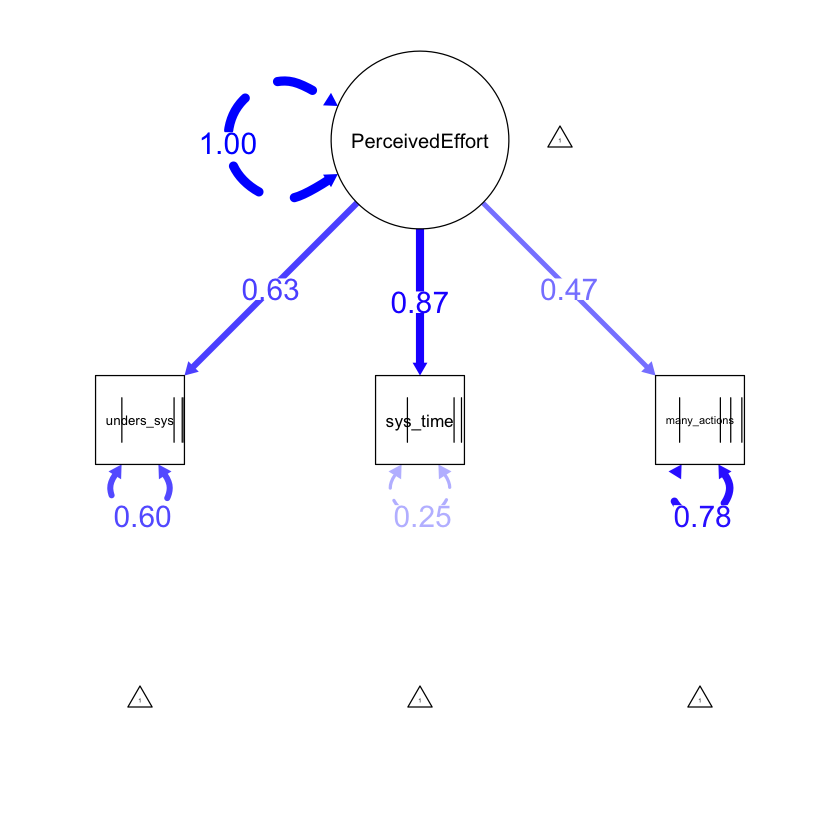

In [44]:
semPaths(perc_effort.model.fit, what = "std", residuals = TRUE, nCharNodes = 0, 
 sizeMan = 10, sizeLat = 20,
   edge.label.cex = 1.5, legend = FALSE,posCol = c("blue"))
# ggsave("./Fig/CFA_KB.png", dpi=300)
dev.print(pdf, './fig/perc_effort.pdf')

In [45]:
### Cronbach Alpha  
per_Efor_alph = cfa_df[, c('sys_time','unders_sys','many_actions')]
per_Efor_alph=cronbach.alpha(per_Efor_alph)
per_Efor_alph


Cronbach's alpha for the 'per_Efor_alph' data-set

Items: 3
Sample units: 240
alpha: 0.528


In [46]:
AVE(perc_effort.model.fit, obs.var = FALSE)

PerceivedEffort 
          0.455

### Understandability

In [47]:
understand.model <- 'Understand =~ under_1+under_2+under_3' 
understand.model.fit <- cfa(understand.model, data = cfa_df, mimic=c('Mplus'), std.lv = TRUE, ordered = TRUE)
print(summary(understand.model.fit, fit.measures = T, standardized=T))

lavaan 0.6.13 ended normally after 1 iteration

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of model parameters                        15

  Number of observations                           240

Model Test User Model:
                                              Standard      Scaled
  Test Statistic                                 0.000       0.000
  Degrees of freedom                                 0           0

Model Test Baseline Model:

  Test statistic                               482.589     410.774
  Degrees of freedom                                 3           3
  P-value                                        0.000       0.000
  Scaling correction factor                                  1.176

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    1.000       1.000
  Tucker-Lewis Index (TLI)                       1.000       1.000
                                       

In [48]:
parameterEstimates(understand.model.fit  , standardized=TRUE) %>%
filter(op == "=~") %>%
select('Latent Factor'=lhs, Indicator=rhs, B=est, SE=se, Z=z, 'p-value'=pvalue, Beta=std.all) %>%
knitr::kable(digits = 3, booktabs=TRUE, format="markdown", caption="Factor Loadings")



Table: Factor Loadings

|Latent Factor |Indicator |     B|    SE|      Z| p-value|  Beta|
|:-------------|:---------|-----:|-----:|------:|-------:|-----:|
|Understand    |under_1   | 0.730| 0.040| 18.420|       0| 0.730|
|Understand    |under_2   | 0.702| 0.051| 13.760|       0| 0.702|
|Understand    |under_3   | 0.825| 0.039| 21.025|       0| 0.825|

pdf 
  2

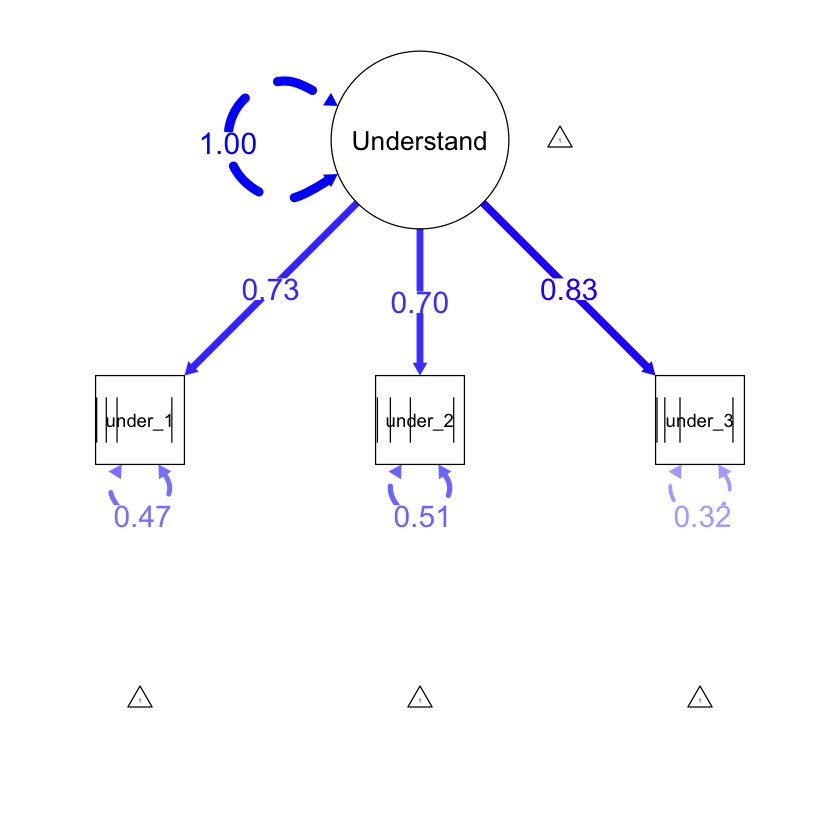

In [49]:
semPaths(understand.model.fit , what = "std", residuals = TRUE, nCharNodes = 0, 
 sizeMan = 10, sizeLat = 20,
   edge.label.cex = 1.5, legend = FALSE,posCol = c("blue"))
# ggsave("./Fig/CFA_KB.png", dpi=300)
dev.print(pdf, './fig/understandability.pdf')

In [50]:
### Cronbach Alpha  

understand_alph = cfa_df[, c('under_1', 'under_2','under_3')]
understand_alph=cronbach.alpha(understand_alph)
understand_alph


Cronbach's alpha for the 'understand_alph' data-set

Items: 3
Sample units: 240
alpha: 0.718


In [51]:
AVE(understand.model.fit, obs.var = FALSE)

Understand 
     0.569

### Usability

In [52]:
nudge_df = read.csv('./cnd_csv/nudge_df.csv')

In [53]:
Usability.model <- 'Usability =~use_1 + use_2'
Usability.model.fit <- cfa(Usability.model, data = nudge_df, mimic=c('Mplus'), std.lv = TRUE, ordered = TRUE)
print(summary(Usability.model.fit, fit.measures = T, standardized=T))

Warning message in lav_model_vcov(lavmodel = lavmodel, lavsamplestats = lavsamplestats, :
"lavaan WARNING:
    Could not compute standard errors! The information matrix could
    not be inverted. This may be a symptom that the model is not
    identified."


lavaan 0.6.13 ended normally after 1 iteration

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of model parameters                        10

  Number of observations                           180

Model Test User Model:
                                                      
  Test statistic                                    NA
  Degrees of freedom                                -1
  P-value (Unknown)                                 NA

Standardized Root Mean Square Residual:

  SRMR                                           0.000

Parameter Estimates:

  Standard errors                           Robust.sem
  Information                                 Expected
  Information saturated (h1) model        Unstructured

Latent Variables:
                   Estimate  Std.Err  z-value  P(>|z|)   Std.lv  Std.all
  Usability =~                                                          
    use_1             1.000       NA 

In [54]:
parameterEstimates(Usability.model.fit , standardized=TRUE) %>%
filter(op == "=~") %>%
select('Latent Factor'=lhs, Indicator=rhs, B=est, SE=se, Z=z, 'p-value'=pvalue, Beta=std.all) %>%
knitr::kable(digits = 3, booktabs=TRUE, format="markdown", caption="Factor Loadings")



Table: Factor Loadings

|Latent Factor |Indicator |     B| SE|  Z| p-value|  Beta|
|:-------------|:---------|-----:|--:|--:|-------:|-----:|
|Usability     |use_1     | 1.000| NA| NA|      NA| 1.000|
|Usability     |use_2     | 0.828| NA| NA|      NA| 0.828|

pdf 
  2

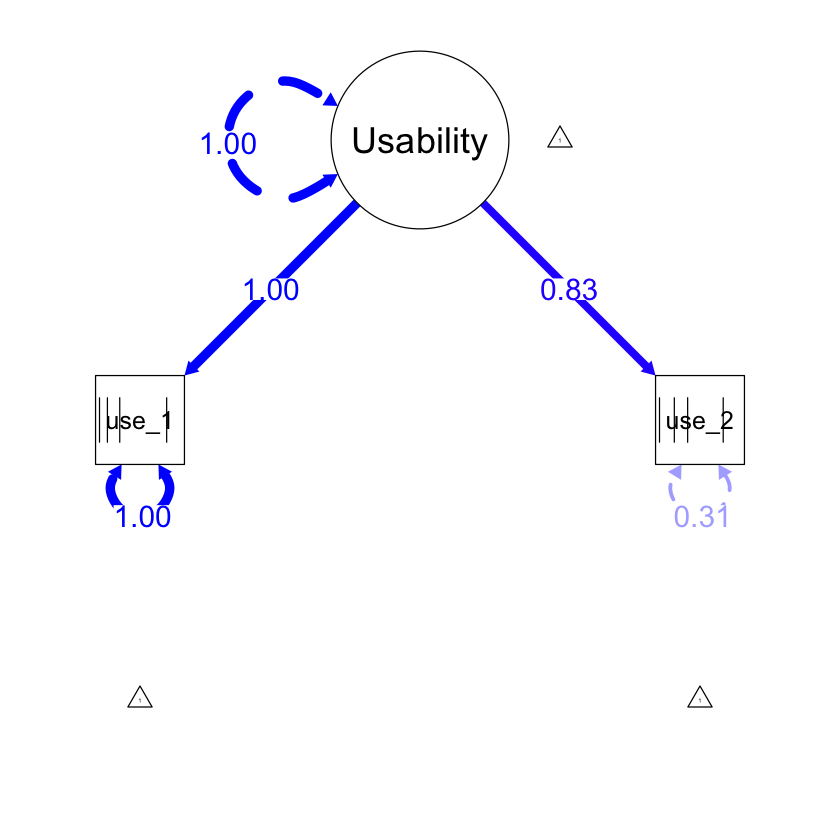

In [55]:
semPaths(Usability.model.fit , what = "std", residuals = TRUE, nCharNodes = 0, 
 sizeMan = 10, sizeLat = 20,
   edge.label.cex = 1.5, legend = FALSE,posCol = c("blue"))
# ggsave("./Fig/CFA_KB.png", dpi=300)
dev.print(pdf, './fig/understandability.pdf')

In [56]:
### Cronbach Alpha
SFD = nudge_df[, c('use_1','use_2')]
sfd_alpha=cronbach.alpha(SFD)
sfd_alpha


Cronbach's alpha for the 'SFD' data-set

Items: 2
Sample units: 180
alpha: 0.841


In [57]:
AVE(Usability.model.fit, obs.var = FALSE)

Usability 
    0.843

## SEM

In [58]:
cfa_df = read.csv('./cnd_csv/cfa_DF.csv')
db_no_use = read.csv('./cnd_csv/allcondition_no_use.csv')

In [59]:
table(db_no_use$condition)


Explanation    Hashtags       Label     noLabel 
         60          60          60          60 

In [60]:
# Ensure condition is a factor
db_no_use$condition <- factor(db_no_use$condition, levels = c("noLabel", "Label", "Hashtags", "Explanation"))



# Create dummy variables for the 'condition' variable
df_dummies  = db_no_use


condition_dummies <- model.matrix(~ condition - 1, data = df_dummies)
df_dummies <- cbind(df_dummies, condition_dummies)

## Only numeric variables
df_dummies <- df_dummies[sapply(df_dummies, is.numeric)]



# # Combine the dummy variables with the original dataset (optional)
# df_dummies <- cbind(df_dummies, dummies)

In [61]:

write.csv(df_dummies,'./cnd_csv/umap_25_df.csv')

In [62]:
# ## User evaluation mean
# allCondition['choice_satisfaction'] = allCondition[['liked_recipes','prepare_recipes','fit_preference','recommend_recipe']].mean(axis=1)
# allCondition['choice_difficulty'] = allCondition[['many_to_choose','easy_choice','choice_overwhelming']].mean(axis=1)
# allCondition['perceived_effort'] = allCondition[['sys_time','unders_sys','many_actions']].mean(axis=1)
# allCondition['SFD'] = allCondition[['FK_9','FK_10','FK_11','FK_12']].mean(axis=1)
# allCondition['Sustain'] = allCondition[['sus_1', 'sus_2', 'sus_3', 'sus_4']].mean(axis=1)

In [63]:
names(df_dummies)

[1] "person"               "FK_9"                 "FK_10"               
 [4] "FK_11"                "FK_12"                "sus_1"               
 [7] "sus_2"                "sus_3"                "sus_4"               
[10] "Height"               "Weight"               "recipe_id"           
[13] "fsa_score"            "liked_recipes"        "prepare_recipes"     
[16] "fit_preference"       "know_many"            "recommend_recipe"    
[19] "many_to_choose"       "easy_choice"          "choice_overwhelming" 
[22] "sys_time"             "unders_sys"           "many_actions"        
[25] "under_1"              "under_2"              "under_3"             
[28] "n_condition"          "choice_satisfaction"  "choice_difficulty"   
[31] "perceived_effort"     "SFD"                  "Sustain"             
[34] "understand"           "conditionnoLabel"     "conditionLabel"      
[37] "conditionHashtags"    "conditionExplanation"

In [64]:
print(colSums(is.na(df_dummies)))  # Count missing values in each column

              person                 FK_9                FK_10 
                   0                    0                    0 
               FK_11                FK_12                sus_1 
                   0                    0                    0 
               sus_2                sus_3                sus_4 
                   0                    0                    0 
              Height               Weight            recipe_id 
                   0                    0                    0 
           fsa_score        liked_recipes      prepare_recipes 
                   0                    0                    0 
      fit_preference            know_many     recommend_recipe 
                   0                    0                    0 
      many_to_choose          easy_choice  choice_overwhelming 
                   0                    0                    0 
            sys_time           unders_sys         many_actions 
                   0                    

In [ ]:
sem_model_without_understan <- "
# Latent Variables
SubjectiveFoodKnowledge =~ FK_9 + FK_10 + FK_11 + FK_12
ChoiceSatisfaction =~ liked_recipes + prepare_recipes + fit_preference + know_many + recommend_recipe
ChoiceDifficulty =~ many_to_choose + easy_choice + choice_overwhelming
PerceivedEffort =~ unders_sys +sys_time+many_actions

# Regressions
fsa_score ~ conditionHashtags + conditionExplanation + conditionLabel 
fsa_score ~ SubjectiveFoodKnowledge 
fsa_score ~ ChoiceSatisfaction + ChoiceDifficulty + PerceivedEffort
ChoiceSatisfaction ~ conditionHashtags + conditionExplanation + conditionLabel 
ChoiceDifficulty ~ conditionHashtags + conditionExplanation + conditionLabel 
PerceivedEffort ~ conditionHashtags + conditionExplanation + conditionLabel 
"

In [213]:
conditionnoLabelfit <- sem(model = sem_model_without_understan, data = df_dummies, ridge = 1e-5)
print(summary(conditionnoLabelfit, fit.measures = TRUE, standardized = TRUE))

lavaan 0.6.13 ended normally after 74 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        55

  Number of observations                           240

Model Test User Model:
                                                      
  Test statistic                               437.415
  Degrees of freedom                               192
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                              1611.793
  Degrees of freedom                               228
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.823
  Tucker-Lewis Index (TLI)                       0.789

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)              -5321.074
  Loglikelihood unrestricted model (H1)      -51

In [319]:
a = df_dummies$FK_12 
b = df_dummies$easy_choice
df_dummies$FK_12 = 6 - df_dummies$FK_12
df_dummies$easy_choice = 6 - df_dummies$easy_choice


In [309]:
sem_model_with_understan<- "
# Latent Variables
ChoiceSatisfaction =~ liked_recipes + prepare_recipes + fit_preference + know_many + recommend_recipe
ChoiceDifficulty =~ many_to_choose + easy_choice + choice_overwhelming
understandability =~ under_1 + under_2 + under_3

# Regressions
fsa_score ~ conditionHashtags + conditionExplanation + conditionLabel  
ChoiceSatisfaction  ~ conditionHashtags + conditionExplanation + conditionLabel
ChoiceDifficulty  ~ conditionHashtags + conditionExplanation + conditionLabel  
understandability  ~ conditionHashtags + conditionExplanation + conditionLabel  
ChoiceSatisfaction ~ understandability 
ChoiceDifficulty ~ understandability 
ChoiceSatisfaction ~ ChoiceDifficulty
"


In [310]:
conditionnoLabelfit <- sem(model = sem_model_with_understan, data = df_dummies, ridge = 1e-5)
print(summary(conditionnoLabelfit, fit.measures = TRUE, standardized = TRUE))

Warning message in lav_object_post_check(object):
"lavaan WARNING: some estimated ov variances are negative"


lavaan 0.6.13 ended normally after 53 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        39

  Number of observations                           240

Model Test User Model:
                                                      
  Test statistic                               127.526
  Degrees of freedom                                75
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                              1043.101
  Degrees of freedom                               102
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.944
  Tucker-Lewis Index (TLI)                       0.924

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)              -3509.771
  Loglikelihood unrestricted model (H1)      -34

## User Evaluation accross conditions 

### Choice satisfaction 

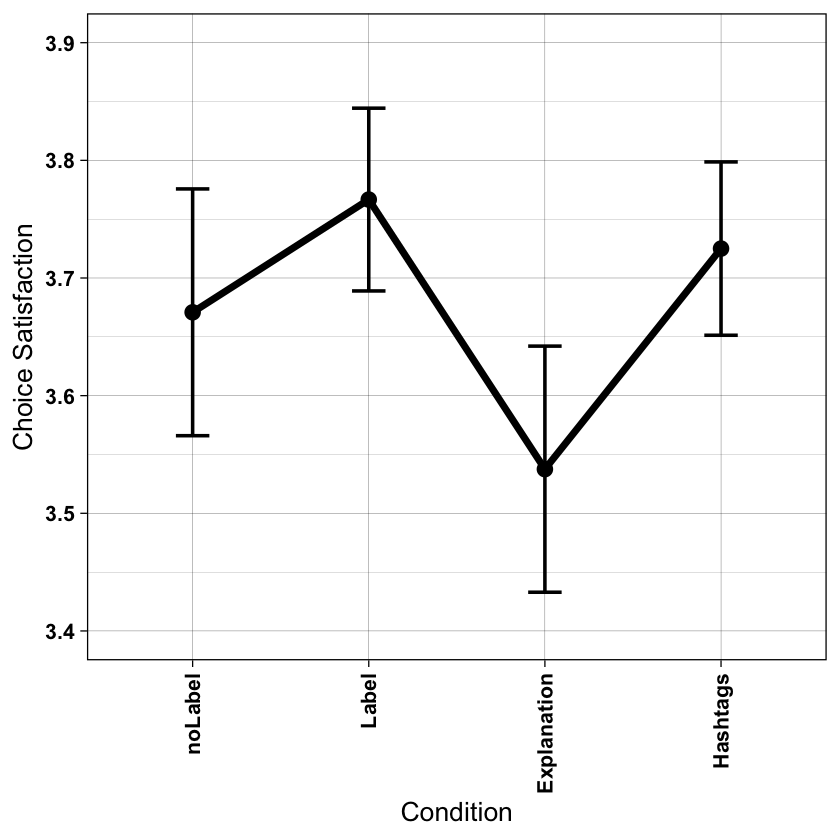

In [265]:
# Group by condition and calculate summary statistics
summary_data <- cfa_df %>%
  group_by(condition) %>%
  summarise(
    mean_choice_sat = mean(choice_satisfaction, na.rm = TRUE),
    se_choice_sat = sd(choice_satisfaction, na.rm = TRUE) / sqrt(n())
  )

# Ensure condition is an ordered factor
summary_data$condition <- ordered(summary_data$condition, levels = c("noLabel", "Label", "Explanation", "Hashtags"))

# Plot with error bars
ggplot(summary_data, aes(x = condition, y = mean_choice_sat, group=1)) +
  geom_line(size = 2) +
  geom_errorbar(aes(
    ymin = mean_choice_sat - se_choice_sat,
    ymax = mean_choice_sat + se_choice_sat
  ), size = 1, width = 0.19) +
  geom_point(size = 2, stroke = 2) +  ylim(3.4, 3.9) +
  theme_linedraw(base_size = 16) +
  theme(
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1),
    axis.text = element_text(face = "bold")
  ) +
  labs(x = "Condition", y = "Choice Satisfaction") 
  ggsave("./fig/distribution_choice_sat_SE.pdf",width=6, height=4,dpi=700)

In [138]:
## ANOVA

df_dummies = cfa_df

# Create dummy variables for the 'Color' column
dummies <- model.matrix(~ condition - 1, data = df_dummies)

# Combine the dummy variables with the original dataset (optional)
label_dummies <- cbind(df_dummies, dummies)

choiceSatisfaction.model <- choice_satisfaction ~ conditionHashtags+conditionExplanation +conditionLabel
choice_sat.fit <- lm(choiceSatisfaction.model, data = label_dummies)
summary <- summary(choice_sat.fit)
print(summary)


Call:
lm(formula = choiceSatisfaction.model, data = label_dummies)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.67083 -0.26667  0.07917  0.32917  1.46250 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           3.67083    0.09138  40.172   <2e-16 ***
conditionHashtags     0.05417    0.12923   0.419    0.675    
conditionExplanation -0.13333    0.12923  -1.032    0.303    
conditionLabel        0.09583    0.12923   0.742    0.459    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7078 on 236 degrees of freedom
Multiple R-squared:  0.01491,	Adjusted R-squared:  0.002388 
F-statistic: 1.191 on 3 and 236 DF,  p-value: 0.314



### Choice difficulty 

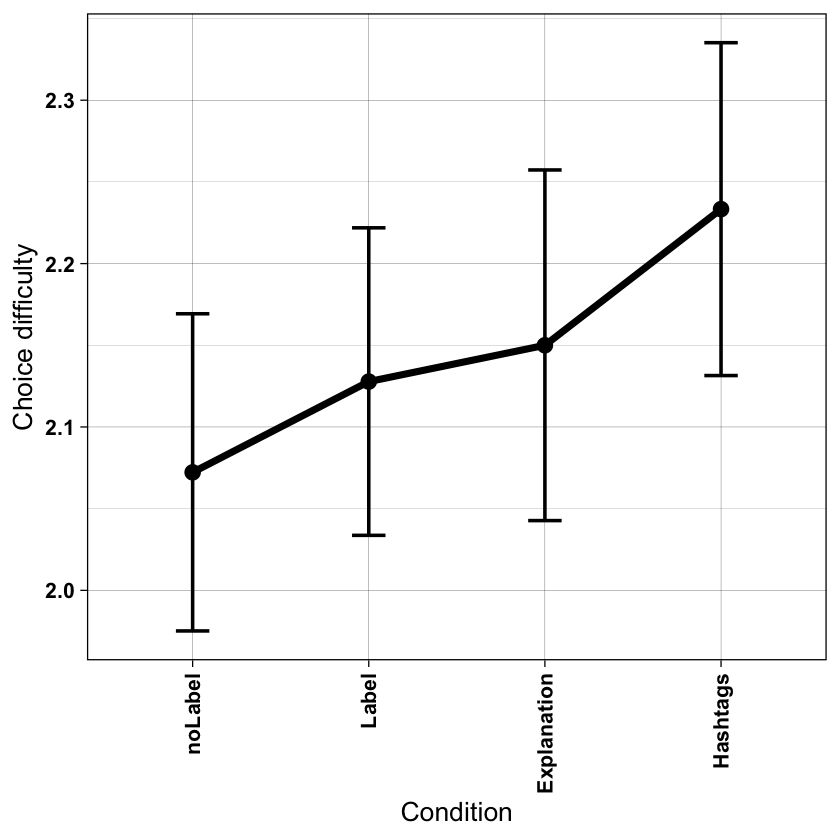

In [267]:
# Group by condition and calculate summary statistics
summary_data <- cfa_df %>%
  group_by(condition) %>%
  summarise(
    mean_choice_diff = mean(choice_difficulty, na.rm = TRUE),
    se_choice_diff = sd(choice_difficulty, na.rm = TRUE) / sqrt(n())
  )

# Ensure condition is an ordered factor
summary_data$condition <- ordered(summary_data$condition, levels = c("noLabel", "Label", "Explanation", "Hashtags"))

# Plot with error bars
ggplot(summary_data, aes(x = condition, y = mean_choice_diff, group=1)) +
  geom_line(size = 2) +
  geom_errorbar(aes(
    ymin = mean_choice_diff - se_choice_diff,
    ymax = mean_choice_diff + se_choice_diff
  ), size = 1, width = 0.19) +
  geom_point(size = 2, stroke = 2) +
  theme_linedraw(base_size = 16) +
  theme(
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1),
    axis.text = element_text(face = "bold")
  ) +
  labs(x = "Condition", y = "Choice difficulty") 
  ggsave("./fig/distribution_choice_diff_SE.pdf",width=6, height=4,dpi=700)

In [140]:
ChoiceDiff.model <- choice_difficulty ~ conditionHashtags+conditionExplanation +conditionLabel
choice_diff.fit <- lm(ChoiceDiff.model, data = label_dummies)
summary <- summary(choice_diff.fit)
print(summary)


Call:
lm(formula = ChoiceDiff.model, data = label_dummies)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2333 -0.4833 -0.1500  0.5389  2.1833 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           2.07222    0.10021  20.678   <2e-16 ***
conditionHashtags     0.16111    0.14172   1.137    0.257    
conditionExplanation  0.07778    0.14172   0.549    0.584    
conditionLabel        0.05556    0.14172   0.392    0.695    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7762 on 236 degrees of freedom
Multiple R-squared:  0.00563,	Adjusted R-squared:  -0.007011 
F-statistic: 0.4454 on 3 and 236 DF,  p-value: 0.7208



### Perceived Effort 

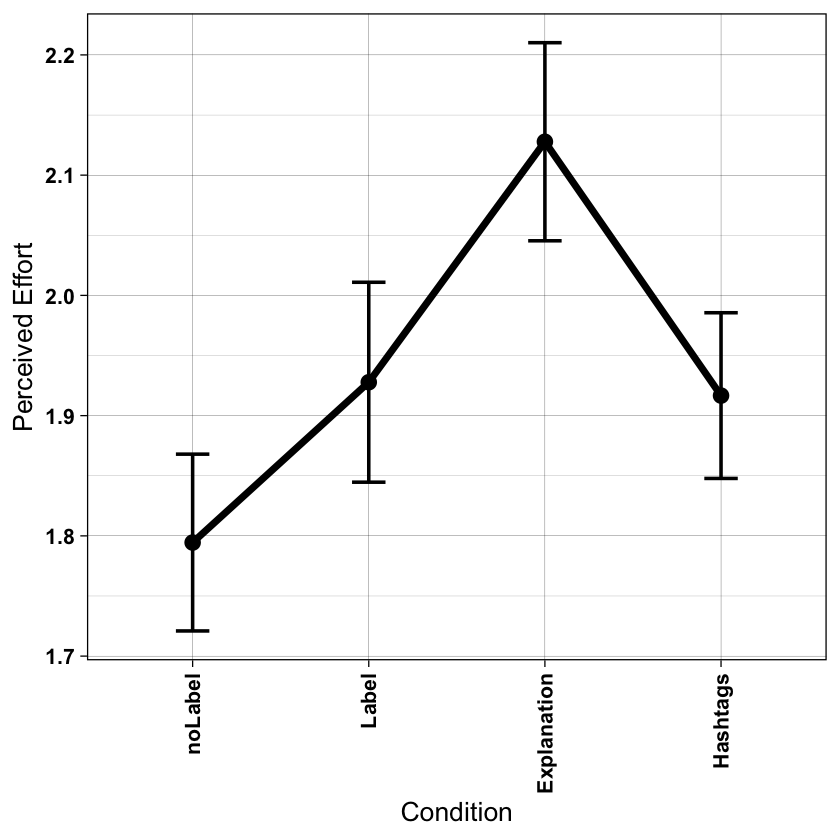

In [141]:
# Group by condition and calculate summary statistics
summary_data <- cfa_df %>%
  group_by(condition) %>%
  summarise(
    mean_perc_eff = mean(perceived_effort, na.rm = TRUE),
    se_perc_eff = sd(perceived_effort, na.rm = TRUE) / sqrt(n())
  )

# Ensure condition is an ordered factor
summary_data$condition <- ordered(summary_data$condition, levels = c("noLabel", "Label", "Explanation", "Hashtags"))

# Plot with error bars
ggplot(summary_data, aes(x = condition, y = mean_perc_eff, group=1)) +
  geom_line(size = 2) +
  geom_errorbar(aes(
    ymin = mean_perc_eff - se_perc_eff,
    ymax = mean_perc_eff + se_perc_eff
  ), size = 1, width = 0.19) +
  geom_point(size = 2, stroke = 2) +
  theme_linedraw(base_size = 16) +
  theme(
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1),
    axis.text = element_text(face = "bold")
  ) +
  labs(x = "Condition", y = "Perceived Effort") 
  ggsave("./fig/distribution_perc_eff_SE.pdf",width=6, height=4,dpi=700)

In [142]:
PercEffort.model <- perceived_effort ~ conditionHashtags+conditionExplanation +conditionLabel
PercEffort.fit <- lm(PercEffort.model, data = label_dummies)
summary <- summary(PercEffort.fit)
print(summary)


Call:
lm(formula = PercEffort.model, data = label_dummies)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.12778 -0.46111  0.07222  0.40556  1.53889 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           1.79444    0.07721  23.240  < 2e-16 ***
conditionHashtags     0.12222    0.10920   1.119  0.26416    
conditionExplanation  0.33333    0.10920   3.053  0.00253 ** 
conditionLabel        0.13333    0.10920   1.221  0.22329    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5981 on 236 degrees of freedom
Multiple R-squared:  0.03902,	Adjusted R-squared:  0.0268 
F-statistic: 3.194 on 3 and 236 DF,  p-value: 0.02428



### Understandability

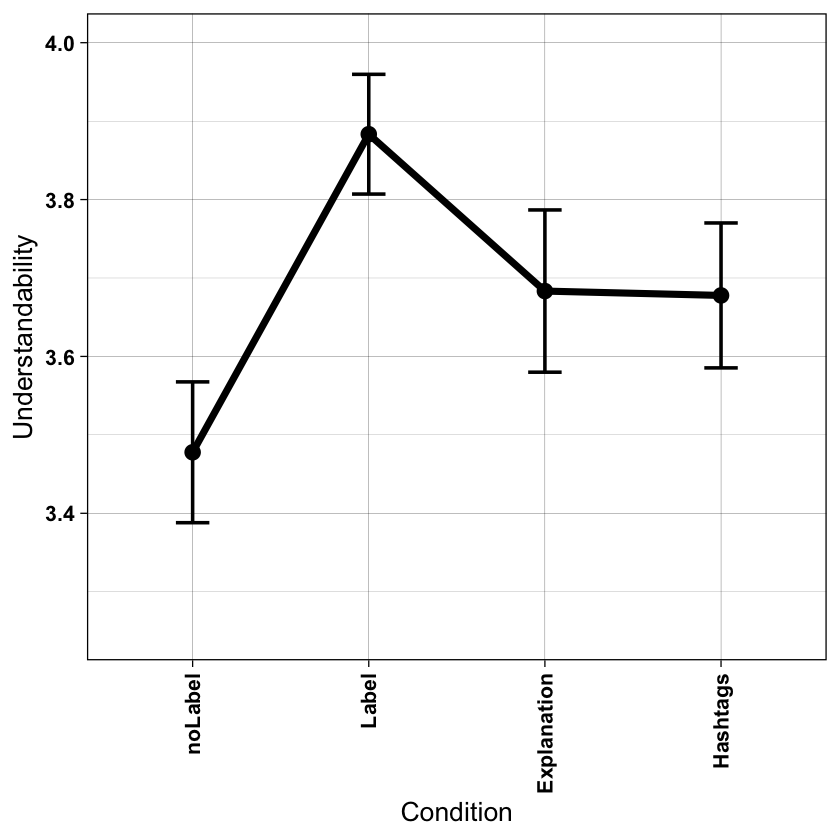

In [271]:
# Group by condition and calculate summary statistics
summary_data <- cfa_df %>%
  group_by(condition) %>%
  summarise(
    mean_unders = mean(understand, na.rm = TRUE),
    se_unders = sd(understand, na.rm = TRUE) / sqrt(n())
  )

# Ensure condition is an ordered factor
summary_data$condition <- ordered(summary_data$condition, levels = c("noLabel", "Label", "Explanation", "Hashtags"))

# Plot with error bars
ggplot(summary_data, aes(x = condition, y = mean_unders, group=1)) +
  geom_line(size = 2) +
  geom_errorbar(aes(
    ymin = mean_unders - se_unders,
    ymax = mean_unders + se_unders
  ), size = 1, width = 0.19) +
  geom_point(size = 2, stroke = 2) + ylim(3.25,4) +
  theme_linedraw(base_size = 16) +
  theme(
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1),
    axis.text = element_text(face = "bold")
  ) +
  labs(x = "Condition", y = "Understandability") 
  ggsave("./fig/distribution_underst_SE.pdf",width=6, height=4,dpi=700)

In [144]:
understand.model <- understand ~ conditionHashtags+conditionExplanation +conditionLabel
understand.fit <- lm(understand.model, data = label_dummies)
summary <- summary(understand.fit)
print(summary)


Call:
lm(formula = understand.model, data = label_dummies)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3500 -0.3500  0.1167  0.4500  1.5222 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           3.47778    0.09099  38.220  < 2e-16 ***
conditionHashtags     0.20000    0.12868   1.554  0.12148    
conditionExplanation  0.20556    0.12868   1.597  0.11152    
conditionLabel        0.40556    0.12868   3.152  0.00183 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7048 on 236 degrees of freedom
Multiple R-squared:  0.04039,	Adjusted R-squared:  0.0282 
F-statistic: 3.311 on 3 and 236 DF,  p-value: 0.0208



In [145]:
## Anova test 
anova_under= aov(understand ~ conditionHashtags+conditionExplanation +conditionLabel, data = label_dummies)
summary(anova_under)

                      Df Sum Sq Mean Sq F value  Pr(>F)   
conditionHashtags      1   0.00   0.001   0.001 0.97191   
conditionExplanation   1   0.00   0.000   0.001 0.98014   
conditionLabel         1   4.93   4.934   9.932 0.00183 **
Residuals            236 117.24   0.497                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

### Usability

Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_line()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_point()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_line()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_point()`)."


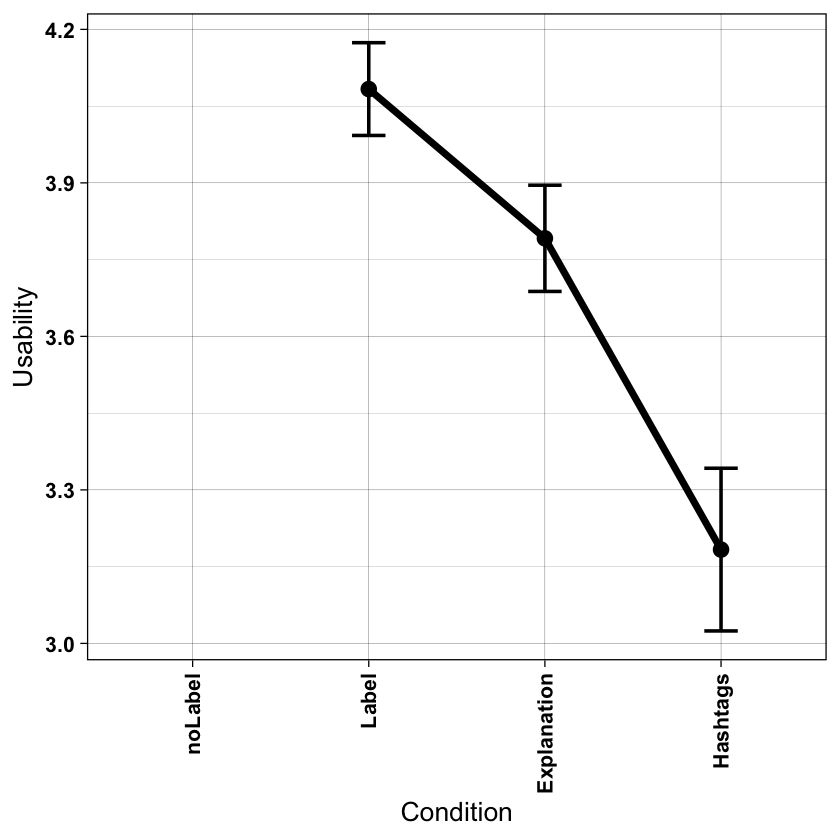

In [146]:
# Group by condition and calculate summary statistics
summary_data <- cfa_df %>%
  group_by(condition) %>%
  summarise(
    mean_usab = mean(usability, na.rm = TRUE),
    se_usab = sd(usability, na.rm = TRUE) / sqrt(n())
  )

# Ensure condition is an ordered factor
summary_data$condition <- ordered(summary_data$condition, levels = c("noLabel", "Label", "Explanation", "Hashtags"))

# Plot with error bars
ggplot(summary_data, aes(x = condition, y = mean_usab, group=1)) +
  geom_line(size = 2) +
  geom_errorbar(aes(
    ymin = mean_usab - se_usab,
    ymax = mean_usab + se_usab
  ), size = 1, width = 0.19) +
  geom_point(size = 2, stroke = 2) +
  theme_linedraw(base_size = 16) +
  theme(
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1),
    axis.text = element_text(face = "bold")
  ) +
  labs(x = "Condition", y = "Usability") 
  ggsave("./fig/distribution_usa_SE.pdf",width=6, height=4,dpi=700)

In [147]:
# Exclude the baseline group ("noLabel")
filtered_data <- cfa_df %>% filter(condition != "noLabel")
# Ensure 'condition' is a factor
filtered_data$condition <- factor(filtered_data$condition, levels = c("Label", "Explanation", "Hashtags"))


# Create dummy variables for the 'Color' column
dummies <- model.matrix(~ condition - 1, data = filtered_data)

# Combine the dummy variables with the original dataset (optional)
nd_dummies <- cbind(filtered_data, dummies)

In [149]:
usability.model <- usability ~ conditionHashtags + conditionExplanation + conditionLabel
usability.fit <- lm(usability.model, data = nd_dummies)
summary <- summary(usability.fit)
print(summary)


Call:
lm(formula = usability.model, data = nd_dummies)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1833 -0.6833  0.2083  0.7354  1.8167 

Coefficients: (1 not defined because of singularities)
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)            4.0833     0.1215  33.614  < 2e-16 ***
conditionHashtags     -0.9000     0.1718  -5.239 4.55e-07 ***
conditionExplanation  -0.2917     0.1718  -1.698   0.0913 .  
conditionLabel             NA         NA      NA       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9409 on 177 degrees of freedom
Multiple R-squared:  0.139,	Adjusted R-squared:  0.1293 
F-statistic: 14.29 on 2 and 177 DF,  p-value: 1.767e-06



In [150]:
## Anova test 
anova_usa= aov(usability  ~  condition, data = nd_dummies)
summary(anova_usa)

             Df Sum Sq Mean Sq F value   Pr(>F)    
condition     2   25.3  12.651   14.29 1.77e-06 ***
Residuals   177  156.7   0.885                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [151]:
Labels_usa_posthoc <- TukeyHSD(anova_usa,  conf.level = 0.95)
Labels_usa_posthoc

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = usability ~ condition, data = nd_dummies)

$condition
                           diff        lwr        upr     p adj
Explanation-Label    -0.2916667 -0.6977154  0.1143821 0.2088823
Hashtags-Label       -0.9000000 -1.3060487 -0.4939513 0.0000014
Hashtags-Explanation -0.6083333 -1.0143821 -0.2022846 0.0014718


In [177]:
usa_posthocDF = as.data.frame(Labels_usa_posthoc$condition)
usa_posthocDF$pair = rownames(usa_posthocDF)

Saving 7 x 7 in image


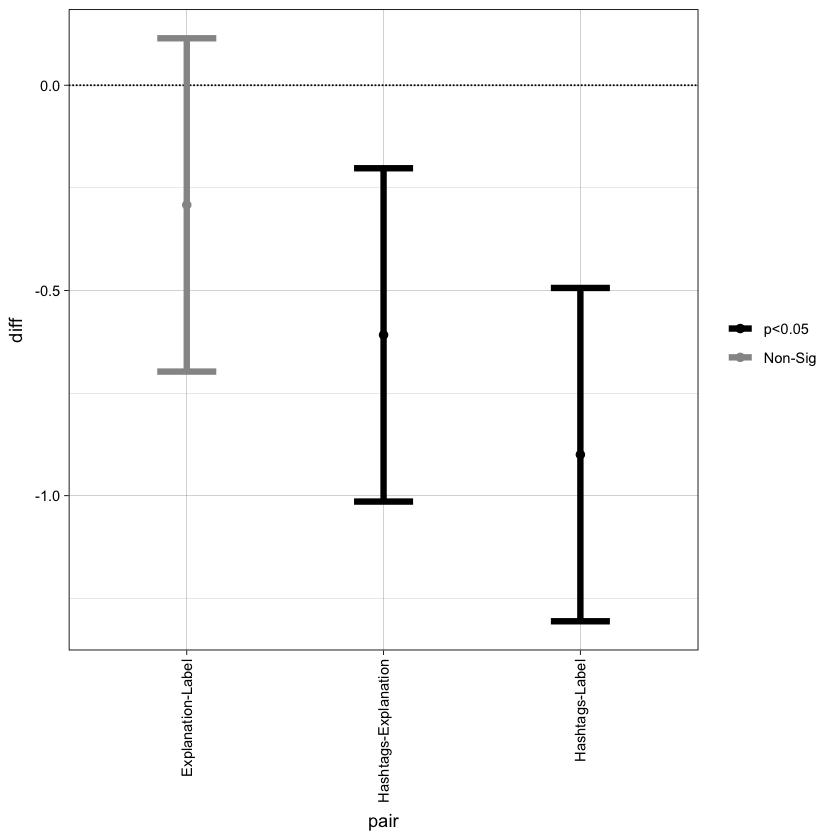

In [178]:

ggplot(usa_posthocDF, aes( colour=cut(`p adj`, c(0, 0.03, 0.05, 1), 
                           label=c("p<0.05","p<0.05","Non-Sig")))) +
  geom_hline(yintercept=0, lty="11", colour="black") +
  geom_errorbar(aes(pair, ymin=lwr, ymax=upr), width=0.3, size=1.8) +
  geom_point(aes(pair, diff), size=2) +
  labs(colour="") +theme_linedraw()+theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +  scale_color_manual(values = c("black", "grey59"))
  ggsave("./fig/usa_HSD.pdf", dpi=300)

### Sustainability


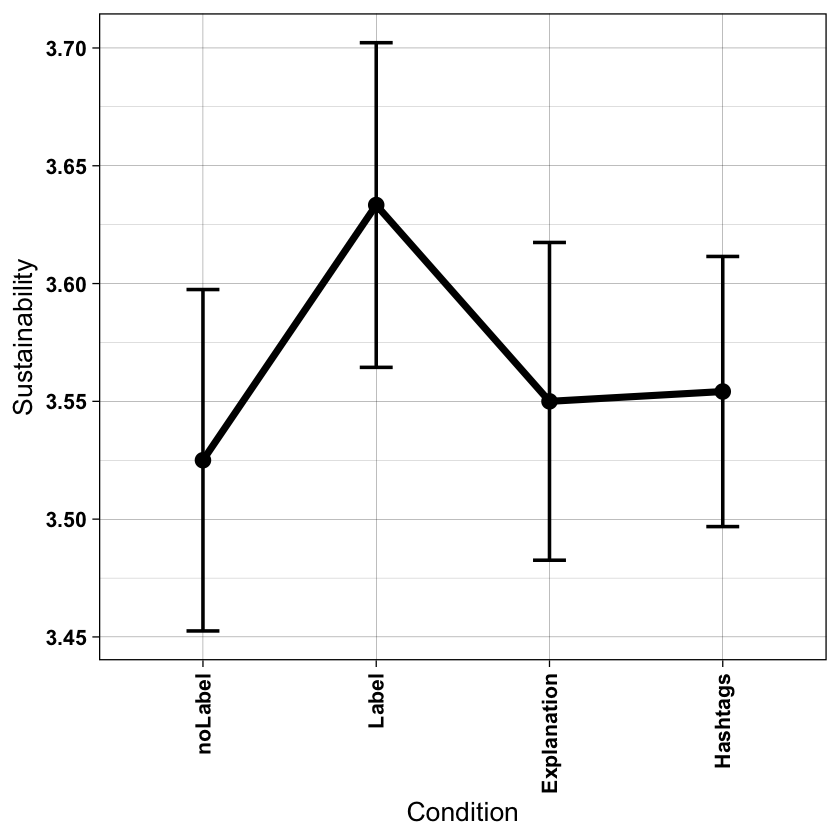

In [259]:
# Group by condition and calculate summary statistics
summary_data <- cfa_df %>%
  group_by(condition) %>%
  summarise(
    mean_sus = mean(Sustain, na.rm = TRUE),
    se_sus = sd(Sustain, na.rm = TRUE) / sqrt(n())
  )

# Ensure condition is an ordered factor
summary_data$condition <- ordered(summary_data$condition, levels = c("noLabel", "Label", "Explanation", "Hashtags"))

# Plot with error bars
ggplot(summary_data, aes(x = condition, y = mean_sus, group=1)) +
  geom_line(size = 2) +
  geom_errorbar(aes(
    ymin = mean_sus - se_sus,
    ymax = mean_sus + se_sus
  ), size = 1, width = 0.19) +
  geom_point(size = 2, stroke = 2) +
  theme_linedraw(base_size = 16) +
  theme(
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1),
    axis.text = element_text(face = "bold")
  ) +
  labs(x = "Condition", y = "Sustainability") 
  ggsave("./fig/distribution_Sustainability.pdf",width=6, height=4,dpi=700)

In [260]:
sustainability.model <- Sustain ~ conditionHashtags+conditionExplanation +conditionLabel
sustainability.fit <- lm(sustainability.model, data = label_dummies)
summary <- summary(sustainability.fit)
print(summary)


Call:
lm(formula = sustainability.model, data = label_dummies)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.04167 -0.32500 -0.04167  0.38333  1.70833 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           3.36667    0.07568  44.487   <2e-16 ***
conditionHashtags    -0.07917    0.10702  -0.740    0.460    
conditionExplanation -0.07500    0.10702  -0.701    0.484    
conditionLabel       -0.04167    0.10702  -0.389    0.697    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5862 on 236 degrees of freedom
Multiple R-squared:  0.002981,	Adjusted R-squared:  -0.009693 
F-statistic: 0.2352 on 3 and 236 DF,  p-value: 0.8718



### SFD

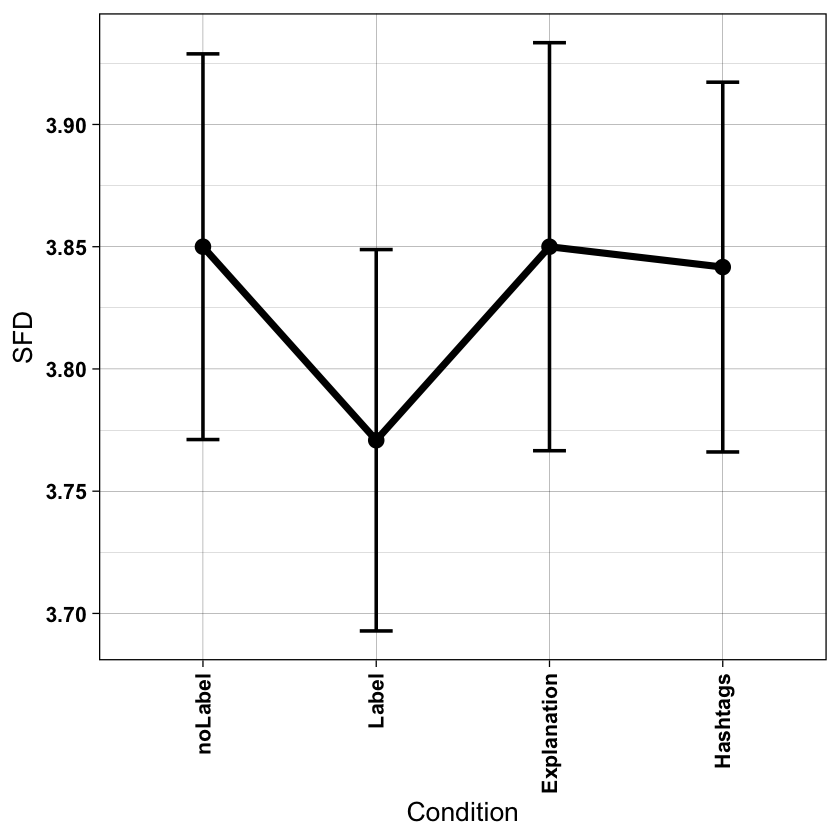

In [261]:
# Group by condition and calculate summary statistics
summary_data <- cfa_df %>%
  group_by(condition) %>%
  summarise(
    mean_sfd = mean(SFD, na.rm = TRUE),
    se_sfd = sd(SFD, na.rm = TRUE) / sqrt(n())
  )

# Ensure condition is an ordered factor
summary_data$condition <- ordered(summary_data$condition, levels = c("noLabel", "Label", "Explanation", "Hashtags"))

# Plot with error bars
ggplot(summary_data, aes(x = condition, y = mean_sfd, group=1)) +
  geom_line(size = 2) +
  geom_errorbar(aes(
    ymin = mean_sfd - se_sfd,
    ymax = mean_sfd + se_sfd
  ), size = 1, width = 0.19) +
  geom_point(size = 2, stroke = 2) +
  theme_linedraw(base_size = 16) +
  theme(
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1),
    axis.text = element_text(face = "bold")
  ) +
  labs(x = "Condition", y = "SFD") 
  ggsave("./fig/distribution_SFD.pdf",width=6, height=4,dpi=700)